# Notebook for Facebook Prophet test #

In [1]:
# normal import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


## Test Import ##

In [3]:
# now test prophet installation
from fbprophet import Prophet
import fbprophet as fbp

In [4]:
fbp.__version__

'0.4'

Seems working fine

## Test package working status ##

### Read dataset ###

In [8]:
df = pd.read_csv("example_wp_log_peyton_manning.csv")

In [9]:
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [13]:
df.tail()

,ds,y
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871
2904,2016-01-20,8.891374


### Load/Train model ###

In [10]:
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


During the model is fitting, following information displayed on the service side console screen:

```
Initial log joint probability = -19.4685
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes
      99       7975.37    0.00149529       224.247           1           1      128
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes
     186       7992.27   5.72063e-05       157.088   5.678e-07       0.001      261  LS failed, Hessian reset
     199       7993.26   0.000312701       314.644      0.1004           1      277
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes
     299       7997.05     0.0015387       170.701           1           1      408
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes
     321       7998.61    0.00020668       308.573    1.22e-06       0.001      478  LS failed, Hessian reset
     369       8000.52   2.98767e-05       97.9518   2.746e-07       0.001      566  LS failed, Hessian reset
     399       8000.98   0.000153501       134.602      0.7945      0.7945      601
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes
     457       8001.99   0.000276407       292.083   2.159e-06       0.001      718  LS failed, Hessian reset
     499       8002.58   0.000699641       197.602           1           1      770
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes
     550       8003.07   5.79234e-05       181.032   3.403e-07       0.001      874  LS failed, Hessian reset
     599       8003.43   0.000218596       78.2273      0.7213      0.7213      928
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes
     695       8004.08   3.66526e-05        116.76   2.994e-07       0.001     1095  LS failed, Hessian reset
     699       8004.11   0.000537041       111.615           1           1     1099
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes
     788        8004.7   3.21305e-06       76.4964   4.987e-08       0.001     1259  LS failed, Hessian reset
     797        8004.7    6.1457e-07       61.1166      0.6741      0.6741     1270
Optimization terminated normally:
  Convergence detected: relative gradient magnitude is below tolerance

```

### Test Future Prediction ###

In [11]:
# future time-stamp determined
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [14]:
# value predicted according to the determined time-stamp dataset
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.199274,7.480175,8.901011
3266,2017-01-16,8.524244,7.816450,9.319489
3267,2017-01-17,8.311615,7.625064,9.054876
3268,2017-01-18,8.144232,7.478030,8.900885
3269,2017-01-19,8.156091,7.473336,8.901035


### Test the Plotting ###

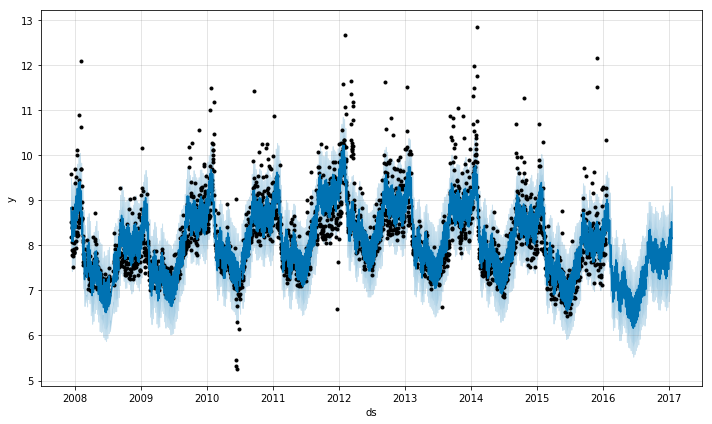

In [15]:
fig1 = m.plot(forecast)

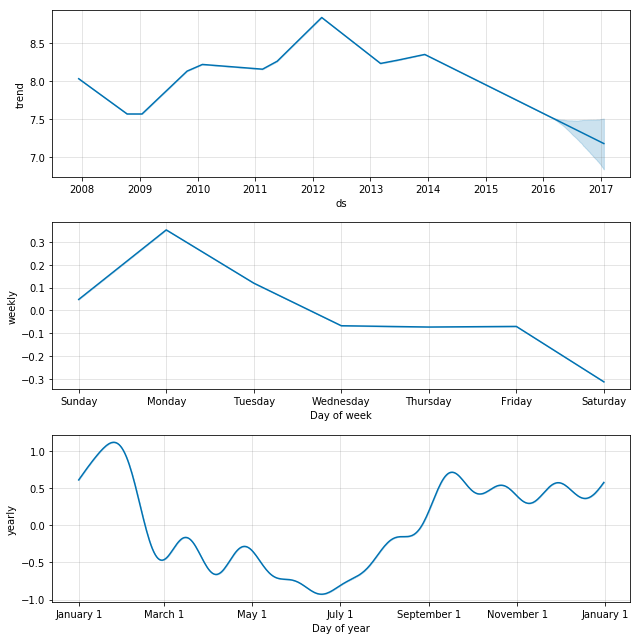

In [16]:
fig2 = m.plot_components(forecast)

Seems the whole prophnet system works fine in training and runtime

## Test the model persistance ##

### Save trained model ###

Use pickle or joblib from sklean, I would recommend sklean joblib, but remember the __version of the sklean__ for save and load.

In [18]:
m

In [19]:
type(m)

fbprophet.forecaster.Prophet

In [20]:
from sklearn.externals import joblib

In [21]:
joblib.dump(filename="test_model", value=m)

['test_model']

### Load the presistant model file ###

In [22]:
load_test_model = joblib.load(filename="test_model")

In [23]:
load_test_model

In [24]:
type(load_test_model)

fbprophet.forecaster.Prophet

In [25]:
future_load = load_test_model.make_future_dataframe(periods=100)
future_load.tail()

,ds
3000,2016-04-25
3001,2016-04-26
3002,2016-04-27
3003,2016-04-28
3004,2016-04-29


In [26]:
forecast_load = load_test_model.predict(future_load)

In [28]:
forecast_load[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3000,2016-04-25,7.523434,6.927112,8.179376
3001,2016-04-26,7.290409,6.661587,7.921104
3002,2016-04-27,7.099358,6.490590,7.749236
3003,2016-04-28,7.084663,6.435378,7.679625
3004,2016-04-29,7.074282,6.487579,7.696614


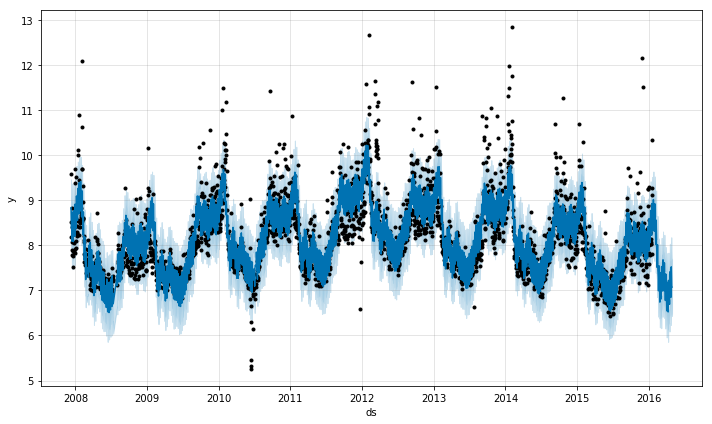

In [29]:
fig_load_1 = load_test_model.plot(forecast_load)

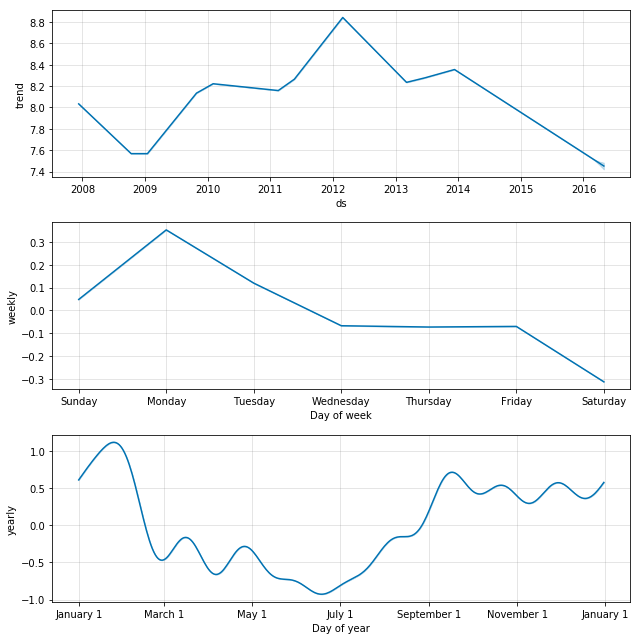

In [30]:
fig_load_2 = load_test_model.plot_components(forecast_load)

Checked, all works according to the design.